# Sample Sheet

In [1]:
# extract nfkb and nd samples
all.samples <- read.csv("SampleSheet.csv")
nfkb.nd.samples <- all.samples[grepl("ND", all.samples$sample_name) | grepl("NFKB", all.samples$sample_name), 1:3]
colnames(nfkb.nd.samples) <-  c("SampleID", "Sex", "Replicate")
nfkb.nd.samples$Condition <- as.character(
    lapply(nfkb.nd.samples$SampleID, function (x) {
        s <- unlist(strsplit(x, "_", TRUE))
        s[length(s) - 1]
    })
)
nfkb.nd.samples$Condition <- as.factor(nfkb.nd.samples$Condition)
rownames(nfkb.nd.samples) <- nfkb.nd.samples$SampleID 

# path for peaks andreads
nfkb.nd.samples$bamReads <- paste0("bam/", nfkb.nd.samples$SampleID, ".trimmed.bowtie2.filtered.bam")
nfkb.nd.samples$Peaks <- paste0("macs2_results/", nfkb.nd.samples$SampleID, "/", 
                                nfkb.nd.samples$SampleID, "_peaks.narrowPeak")
nfkb.nd.samples$PeakCaller <- "narrow"
head(nfkb.nd.samples)

,SampleID,Sex,Replicate,Condition,bamReads,Peaks,PeakCaller
,<chr>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>
ATAC024_CB_FR005.1_NFKB1_sB,ATAC024_CB_FR005.1_NFKB1_sB,female,20200205,NFKB1,bam/ATAC024_CB_FR005.1_NFKB1_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC024_CB_FR005.1_NFKB1_sB/ATAC024_CB_FR005.1_NFKB1_sB_peaks.narrowPeak,narrow
ATAC074_CB_FR023.1_NFKB1_sB,ATAC074_CB_FR023.1_NFKB1_sB,female,20200217,NFKB1,bam/ATAC074_CB_FR023.1_NFKB1_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC074_CB_FR023.1_NFKB1_sB/ATAC074_CB_FR023.1_NFKB1_sB_peaks.narrowPeak,narrow
ATAC100_CB_FR032.1_NFKB2_sB,ATAC100_CB_FR032.1_NFKB2_sB,female,20200217,NFKB2,bam/ATAC100_CB_FR032.1_NFKB2_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC100_CB_FR032.1_NFKB2_sB/ATAC100_CB_FR032.1_NFKB2_sB_peaks.narrowPeak,narrow
ATAC102_CB_FR033.1_NFKB2_sB,ATAC102_CB_FR033.1_NFKB2_sB,female,20200217,NFKB2,bam/ATAC102_CB_FR033.1_NFKB2_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC102_CB_FR033.1_NFKB2_sB/ATAC102_CB_FR033.1_NFKB2_sB_peaks.narrowPeak,narrow
ATAC105_CB_FR034.1_NFKB2_sB,ATAC105_CB_FR034.1_NFKB2_sB,female,20200217,NFKB2,bam/ATAC105_CB_FR034.1_NFKB2_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC105_CB_FR034.1_NFKB2_sB/ATAC105_CB_FR034.1_NFKB2_sB_peaks.narrowPeak,narrow
ATAC108_CB_FR035.1_NFKB2_sB,ATAC108_CB_FR035.1_NFKB2_sB,female,20200217,NFKB2,bam/ATAC108_CB_FR035.1_NFKB2_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC108_CB_FR035.1_NFKB2_sB/ATAC108_CB_FR035.1_NFKB2_sB_peaks.narrowPeak,narrow


In [2]:
# filter low quality samples, less than 10k peaks
valid.samples <- lapply(nfkb.nd.samples$Peaks, function (x) {
    if (file.exists(x)) {
        if (nrow(read.csv(x)) >= 10000) {
            return(TRUE)
        }
    }
    FALSE
})
cat(paste(c("Removed samples:", nfkb.nd.samples$SampleID[!unlist(valid.samples)]), " "))
nfkb.nd.samples <- nfkb.nd.samples[unlist(valid.samples), ]
cat("\n")
cat(paste(c("Unique batchs:", unique(nfkb.nd.samples$Batch)), " "))

head(nfkb.nd.samples)

Removed samples:   ATAC024_CB_FR005.1_NFKB1_sB   ATAC161_CB_FR053.1_NFKB1_sB  
Unique batchs:  

,SampleID,Sex,Replicate,Condition,bamReads,Peaks,PeakCaller
,<chr>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>
ATAC074_CB_FR023.1_NFKB1_sB,ATAC074_CB_FR023.1_NFKB1_sB,female,20200217,NFKB1,bam/ATAC074_CB_FR023.1_NFKB1_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC074_CB_FR023.1_NFKB1_sB/ATAC074_CB_FR023.1_NFKB1_sB_peaks.narrowPeak,narrow
ATAC100_CB_FR032.1_NFKB2_sB,ATAC100_CB_FR032.1_NFKB2_sB,female,20200217,NFKB2,bam/ATAC100_CB_FR032.1_NFKB2_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC100_CB_FR032.1_NFKB2_sB/ATAC100_CB_FR032.1_NFKB2_sB_peaks.narrowPeak,narrow
ATAC102_CB_FR033.1_NFKB2_sB,ATAC102_CB_FR033.1_NFKB2_sB,female,20200217,NFKB2,bam/ATAC102_CB_FR033.1_NFKB2_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC102_CB_FR033.1_NFKB2_sB/ATAC102_CB_FR033.1_NFKB2_sB_peaks.narrowPeak,narrow
ATAC105_CB_FR034.1_NFKB2_sB,ATAC105_CB_FR034.1_NFKB2_sB,female,20200217,NFKB2,bam/ATAC105_CB_FR034.1_NFKB2_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC105_CB_FR034.1_NFKB2_sB/ATAC105_CB_FR034.1_NFKB2_sB_peaks.narrowPeak,narrow
ATAC108_CB_FR035.1_NFKB2_sB,ATAC108_CB_FR035.1_NFKB2_sB,female,20200217,NFKB2,bam/ATAC108_CB_FR035.1_NFKB2_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC108_CB_FR035.1_NFKB2_sB/ATAC108_CB_FR035.1_NFKB2_sB_peaks.narrowPeak,narrow
ATAC111_CB_FR036.1_NFKB1_sB,ATAC111_CB_FR036.1_NFKB1_sB,female,20200217,NFKB1,bam/ATAC111_CB_FR036.1_NFKB1_sB.trimmed.bowtie2.filtered.bam,macs2_results/ATAC111_CB_FR036.1_NFKB1_sB/ATAC111_CB_FR036.1_NFKB1_sB_peaks.narrowPeak,narrow


# Find Consensus Peaks
Peaks that were at least shown in two samples

In [4]:
library(DiffBind)
library(repr)

In [5]:
db.obj <- dba(sampleSheet = nfkb.nd.samples, bRemoveM = TRUE, minOverlap = 2)
db.obj

ATAC074_CB_FR023.1_NFKB1_sB   NFKB1  20200217 narrow

ATAC100_CB_FR032.1_NFKB2_sB   NFKB2  20200217 narrow

ATAC102_CB_FR033.1_NFKB2_sB   NFKB2  20200217 narrow

ATAC105_CB_FR034.1_NFKB2_sB   NFKB2  20200217 narrow

ATAC108_CB_FR035.1_NFKB2_sB   NFKB2  20200217 narrow

ATAC111_CB_FR036.1_NFKB1_sB   NFKB1  20200217 narrow

ATAC123_CB_FR040.1_ND_sB   ND  20200217 narrow

ATAC137_CB_FR045.1_ND_sB   ND  20200217 narrow

ATAC140_CB_FR046.1_ND_sB   ND  20200217 narrow

ATAC143_CB_FR047.1_ND_sB   ND  20200217 narrow

ATAC146_CB_FR048.1_ND_sB   ND  20200217 narrow

ATAC149_CB_FR049.1_ND_sB   ND  20200217 narrow

ATAC152_CB_FR050.1_ND_sB   ND  20200217 narrow

ATAC155_CB_FR051.1_ND_sB   ND  20200217 narrow

ATAC158_CB_FR052.1_ND_sB   ND  20200217 narrow

ATAC176_CB_FR058.1_ND_sB   ND  20200602 narrow

ATAC185_CB_FR061.1_ND_sB   ND  20200602 narrow

ATAC188_CB_FR062.1_ND_sB   ND  20200602 narrow

ATAC191_CB_FR063.1_ND_sB   ND  20200602 narrow

ATAC194_CB_FR064.1_ND_sB   ND  20200602 narrow

ATAC

29 Samples, 71461 sites in matrix (94289 total):
                            ID Condition Replicate Intervals
1  ATAC074_CB_FR023.1_NFKB1_sB     NFKB1  20200217     39364
2  ATAC100_CB_FR032.1_NFKB2_sB     NFKB2  20200217     37010
3  ATAC102_CB_FR033.1_NFKB2_sB     NFKB2  20200217     39284
4  ATAC105_CB_FR034.1_NFKB2_sB     NFKB2  20200217     31124
5  ATAC108_CB_FR035.1_NFKB2_sB     NFKB2  20200217     24386
6  ATAC111_CB_FR036.1_NFKB1_sB     NFKB1  20200217     43964
7     ATAC123_CB_FR040.1_ND_sB        ND  20200217     33879
8     ATAC137_CB_FR045.1_ND_sB        ND  20200217     51609
9     ATAC140_CB_FR046.1_ND_sB        ND  20200217     53394
10    ATAC143_CB_FR047.1_ND_sB        ND  20200217     51851
11    ATAC146_CB_FR048.1_ND_sB        ND  20200217     37563
12    ATAC149_CB_FR049.1_ND_sB        ND  20200217     46183
13    ATAC152_CB_FR050.1_ND_sB        ND  20200217     55939
14    ATAC155_CB_FR051.1_ND_sB        ND  20200217     60298
15    ATAC158_CB_FR052.1_ND_sB      

Remove peaks in blacklist regions

In [6]:
db.obj <- dba.blacklist(db.obj, blacklist = DBA_BLACKLIST_HG38, greylist = FALSE)

Genome detected: Hsapiens.UCSC.hg38

Applying blacklist...

Removed: 1531 of 1354698 intervals.

Removed: 187 merged (of 94289) and 118 (of 71461) consensus.



Centered peaks and make count matrix

In [7]:
# db.obj$config$singleEnd <- FALSE
db.obj <- dba.count(db.obj, score = DBA_SCORE_READS)

Computing summits...

Re-centering peaks...



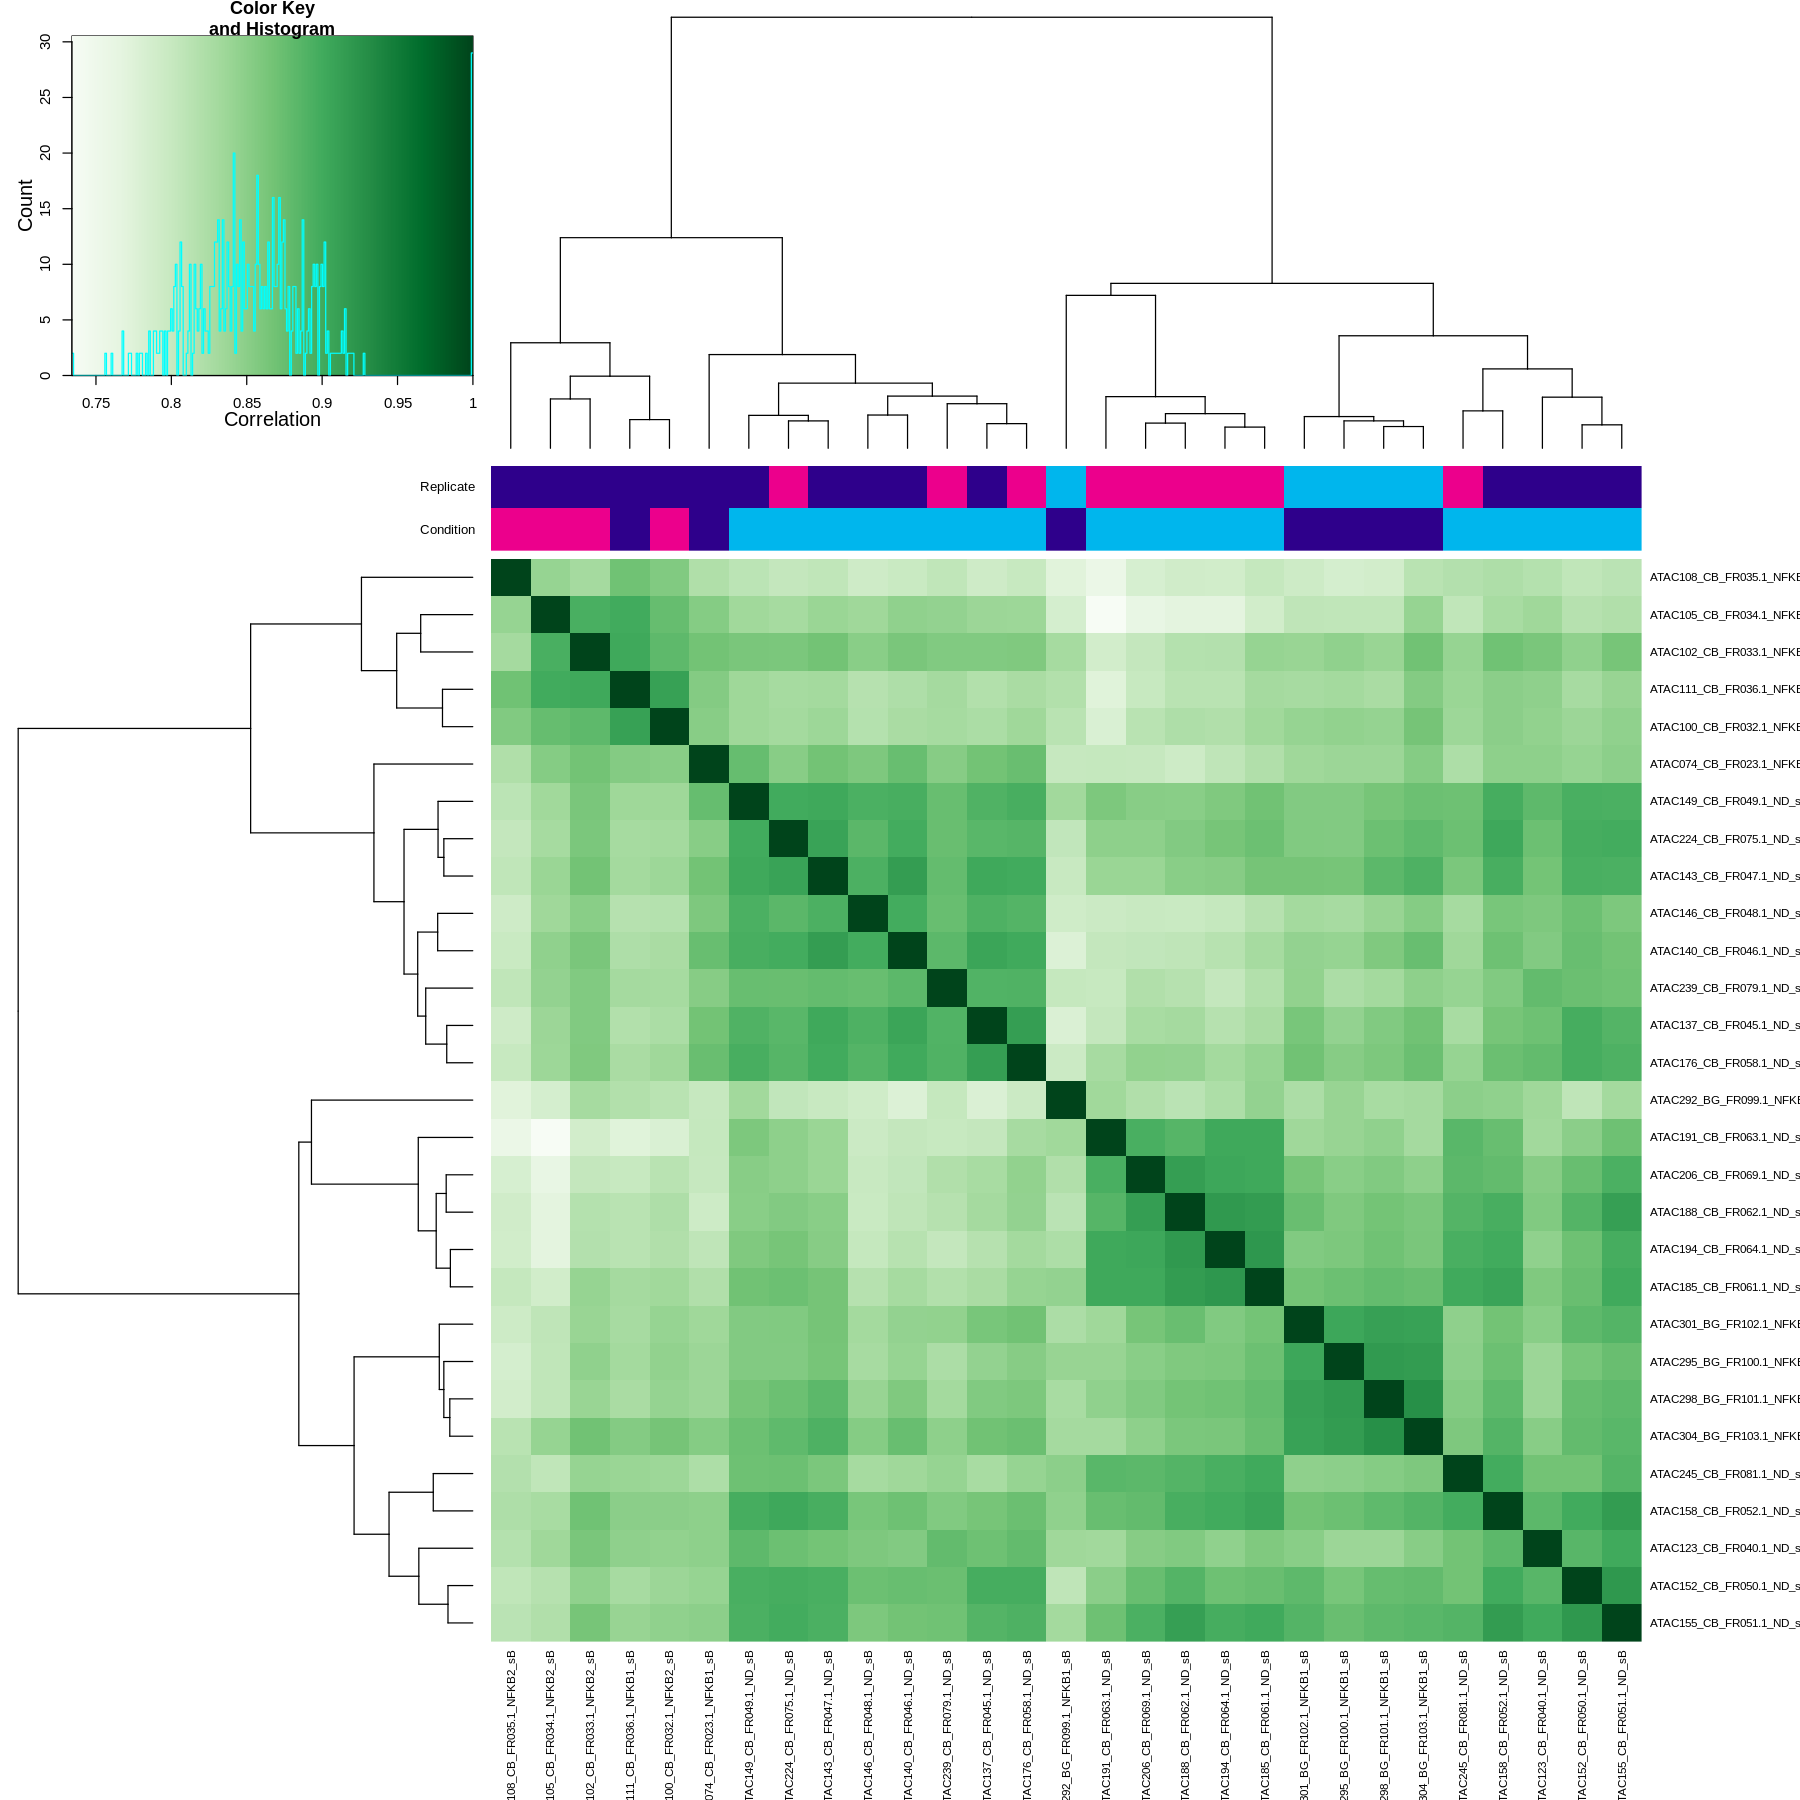

In [8]:
options(repr.plot.width=15, repr.plot.height=15)
dba.plotHeatmap(db.obj, ColAttributes = c(DBA_REPLICATE, DBA_CONDITION))

1. Cluster were mostly according to the outcomes. 
2. But confounding effects might be obscured the relative relationship among samples. Potentially from "Replicate".
3. Also it is better to stablize variation for features before clustering

# Remove Batch Effect

In [10]:
library(sva)

In [11]:
counts <- as.data.frame(dba.peakset(db.obj, bRetrieve = TRUE))
counts <- as.matrix(counts[, 6:dim(counts)[2]])
head(counts)

,ATAC074_CB_FR023.1_NFKB1_sB,ATAC100_CB_FR032.1_NFKB2_sB,ATAC102_CB_FR033.1_NFKB2_sB,ATAC105_CB_FR034.1_NFKB2_sB,ATAC108_CB_FR035.1_NFKB2_sB,ATAC111_CB_FR036.1_NFKB1_sB,ATAC123_CB_FR040.1_ND_sB,ATAC137_CB_FR045.1_ND_sB,ATAC140_CB_FR046.1_ND_sB,ATAC143_CB_FR047.1_ND_sB,⋯,ATAC194_CB_FR064.1_ND_sB,ATAC206_CB_FR069.1_ND_sB,ATAC224_CB_FR075.1_ND_sB,ATAC239_CB_FR079.1_ND_sB,ATAC245_CB_FR081.1_ND_sB,ATAC292_BG_FR099.1_NFKB1_sB,ATAC295_BG_FR100.1_NFKB1_sB,ATAC298_BG_FR101.1_NFKB1_sB,ATAC301_BG_FR102.1_NFKB1_sB,ATAC304_BG_FR103.1_NFKB1_sB
1,11,6,7,5,9,10,14,9,10,11,⋯,11,12,16,12,13,8,6,12,8,8
2,13,8,11,5,10,12,12,11,12,9,⋯,12,16,8,20,16,16,9,13,9,9
3,5,6,2,9,5,10,8,9,9,3,⋯,12,16,16,17,17,10,3,2,0,3
4,79,91,79,68,62,125,73,75,77,87,⋯,119,107,104,91,91,44,66,74,89,85
5,11,5,12,7,5,9,2,10,8,11,⋯,24,16,23,8,10,3,3,12,13,22
6,40,72,72,42,36,82,34,54,47,49,⋯,73,67,67,52,58,42,51,69,45,65


In [12]:
adjusted <- ComBat_seq(counts, batch = nfkb.nd.samples$Replicate)

Found 3 batches
Using null model in ComBat-seq.
Adjusting for 0 covariate(s) or covariate level(s)
Estimating dispersions
Fitting the GLM model
Shrinkage off - using GLM estimates for parameters
Adjusting the data


In [80]:
db.obj$binding[, 4:dim(db.obj$binding)[2]] <- counts

In [166]:
db.obj <- dba.normalize(db.obj, normalize = DBA_NORM_NATIVE, background = TRUE)

Generating background bins...



In [167]:
db.obj <- dba.count(db.obj, peaks = NULL,  score=DBA_SCORE_NORMALIZED)

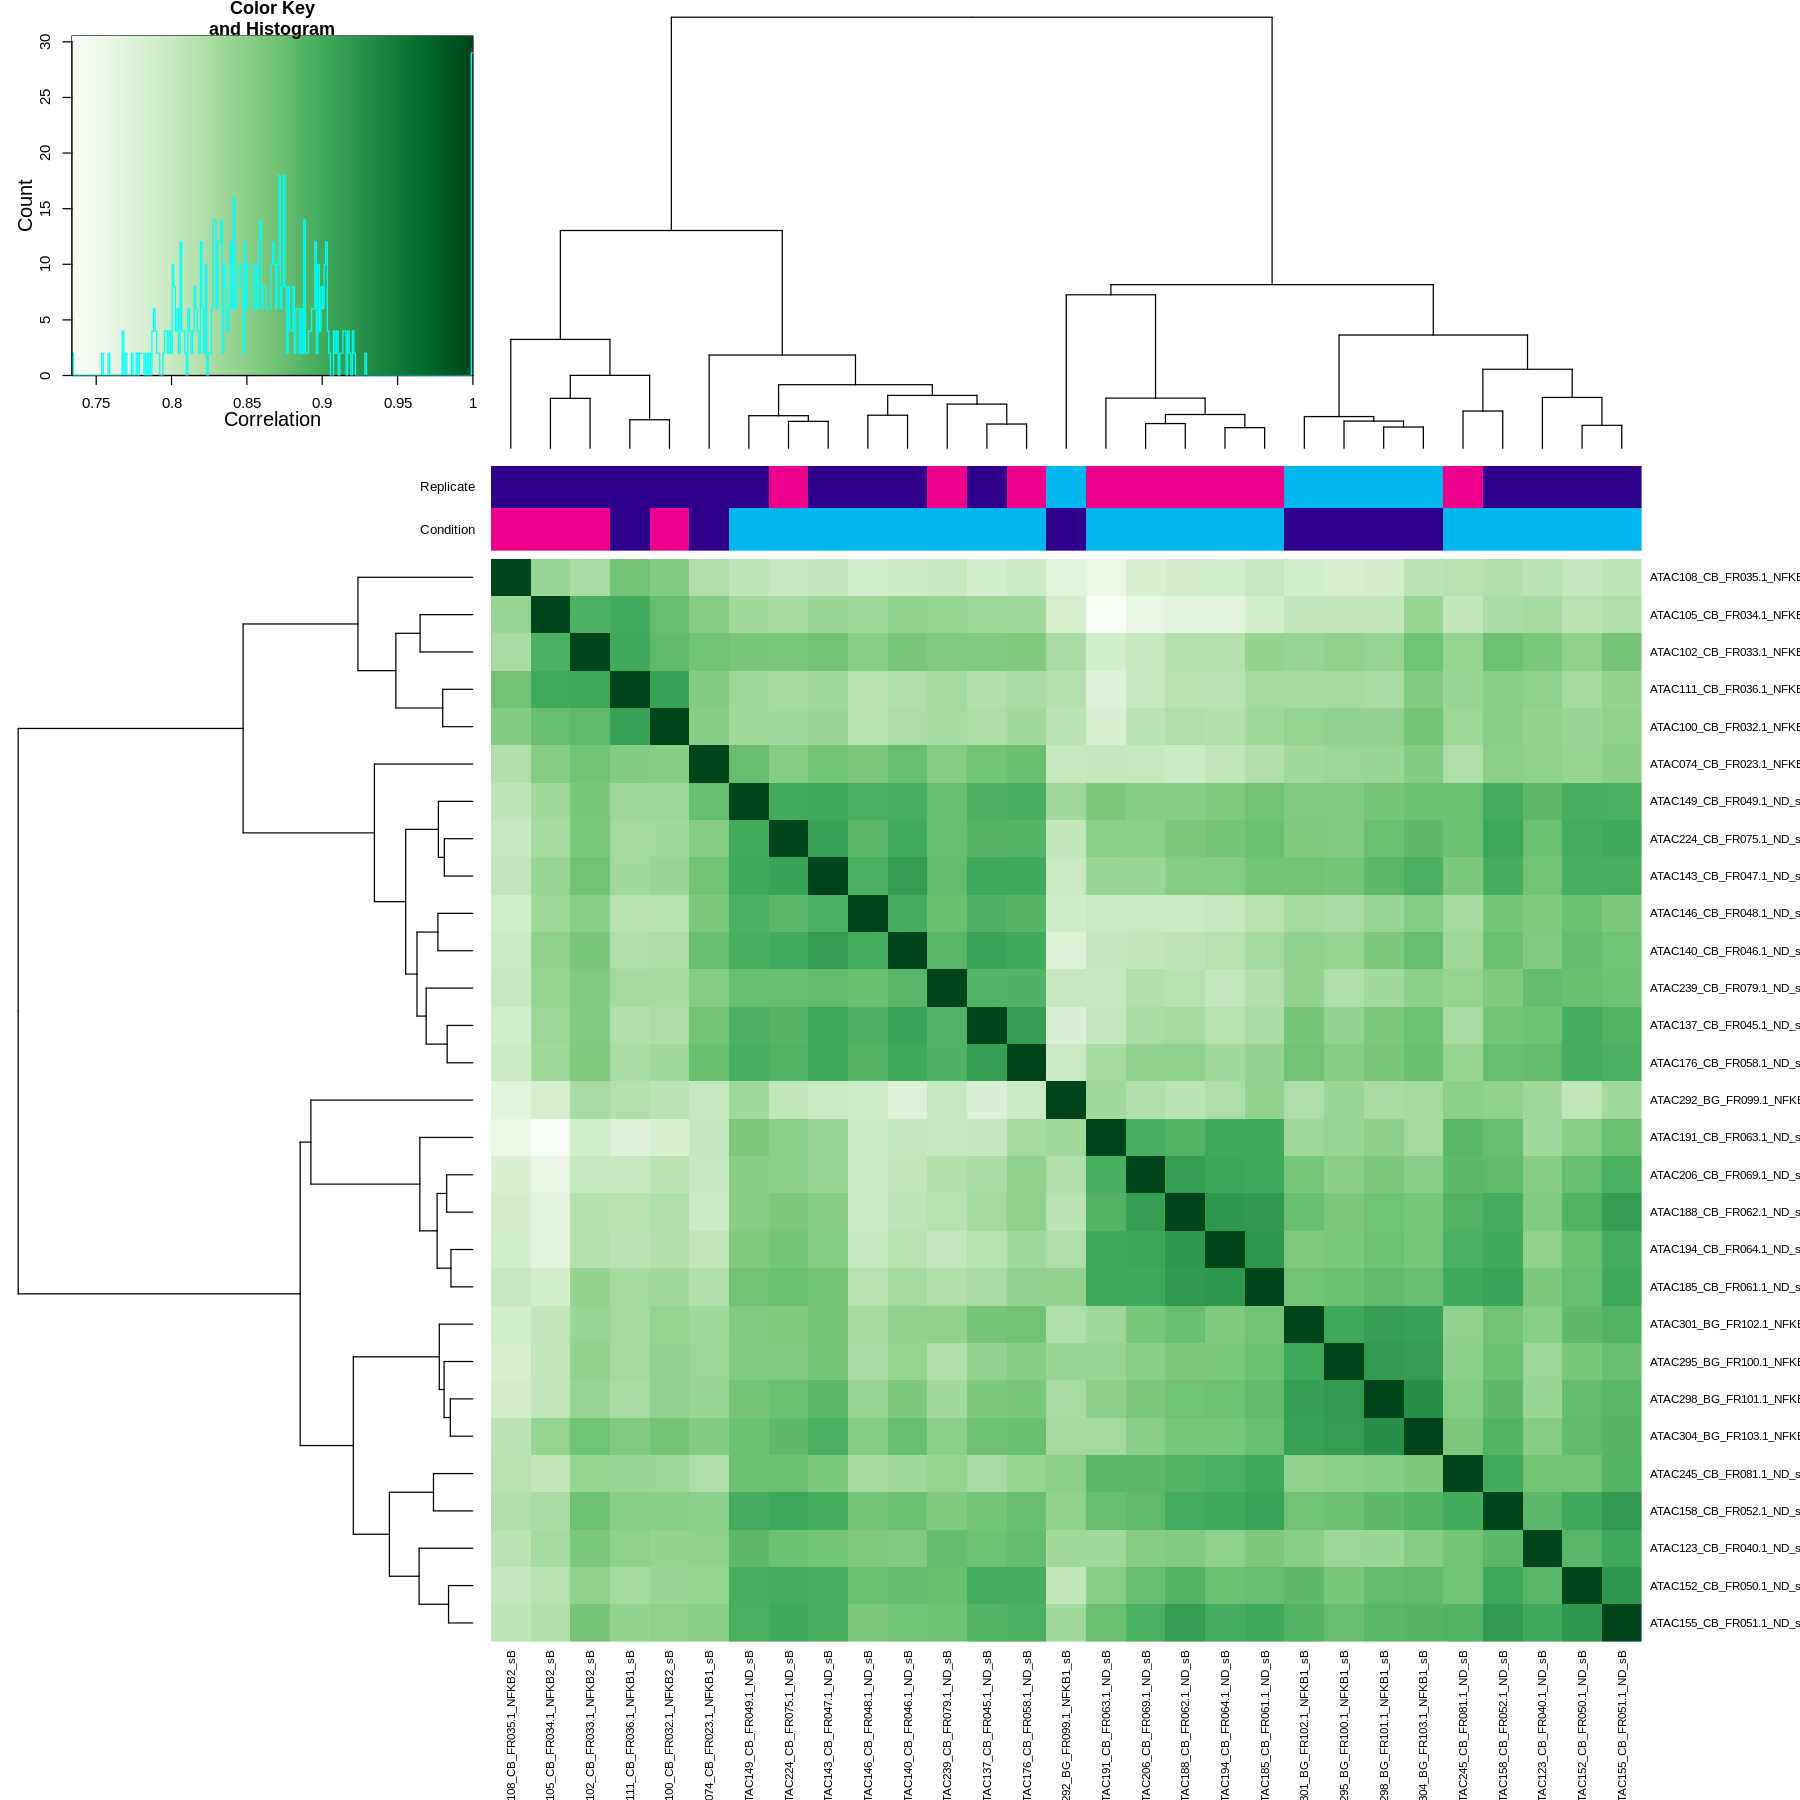

In [158]:
options(repr.plot.width=15, repr.plot.height=15)
dba.plotHeatmap(db.obj, ColAttributes = c(DBA_REPLICATE, DBA_CONDITION))

In [27]:
library(ComplexHeatmap)

In [122]:
unlist(db.obj$norm[[1]][7], use.names = FALSE)

[1] 17037728 14999849 15709236 17834463 14668534 19705624 14896989 19206090
 [9] 20835035 17413875 15884090 19983765 17966804 21932024 19536390 21051264
[17] 19139920 18991194 17722219 18073016 14876475 17498643 22177981 22538368
[25] 24817798 12010380 16946704 14629397 18355560

In [173]:
dba.peakset(db.obj, peaks = NULL, score = DBA_SCORE_NORMALIZED, bRetrieve = TRUE)

GRanges object with 69528 ranges and 29 metadata columns:
        seqnames            ranges strand | ATAC074_CB_FR023.1_NFKB1_sB
           <Rle>         <IRanges>  <Rle> |                   <numeric>
      1     chr1        9979-10379      * |                    11.22634
      2     chr1     180640-181040      * |                    13.26749
      3     chr1     181259-181659      * |                     5.10288
      4     chr1     778548-778948      * |                    80.62551
      5     chr1     804736-805136      * |                    11.22634
    ...      ...               ...    ... .                         ...
  69524     chrY 21422208-21422608      * |                           0
  69525     chrY 21440525-21440925      * |                           0
  69526     chrY 21679559-21679959      * |                           0
  69527     chrY 26670397-26670797      * |                           0
  69528     chrY 26670929-26671329      * |                           0
      

In [171]:
log_mat <- as.data.frame(dba.peakset(db.obj, peaks = NULL, score = DBA_SCORE_NORMALIZED, bRetrieve = TRUE))[, 6:34] 
# log_mat <- log_mat / unlist(db.obj$norm[[1]][7], use.names = FALSE) * 1e6
log_mat[log_mat < 1] <- 1
log_mat <- log2(log_mat)

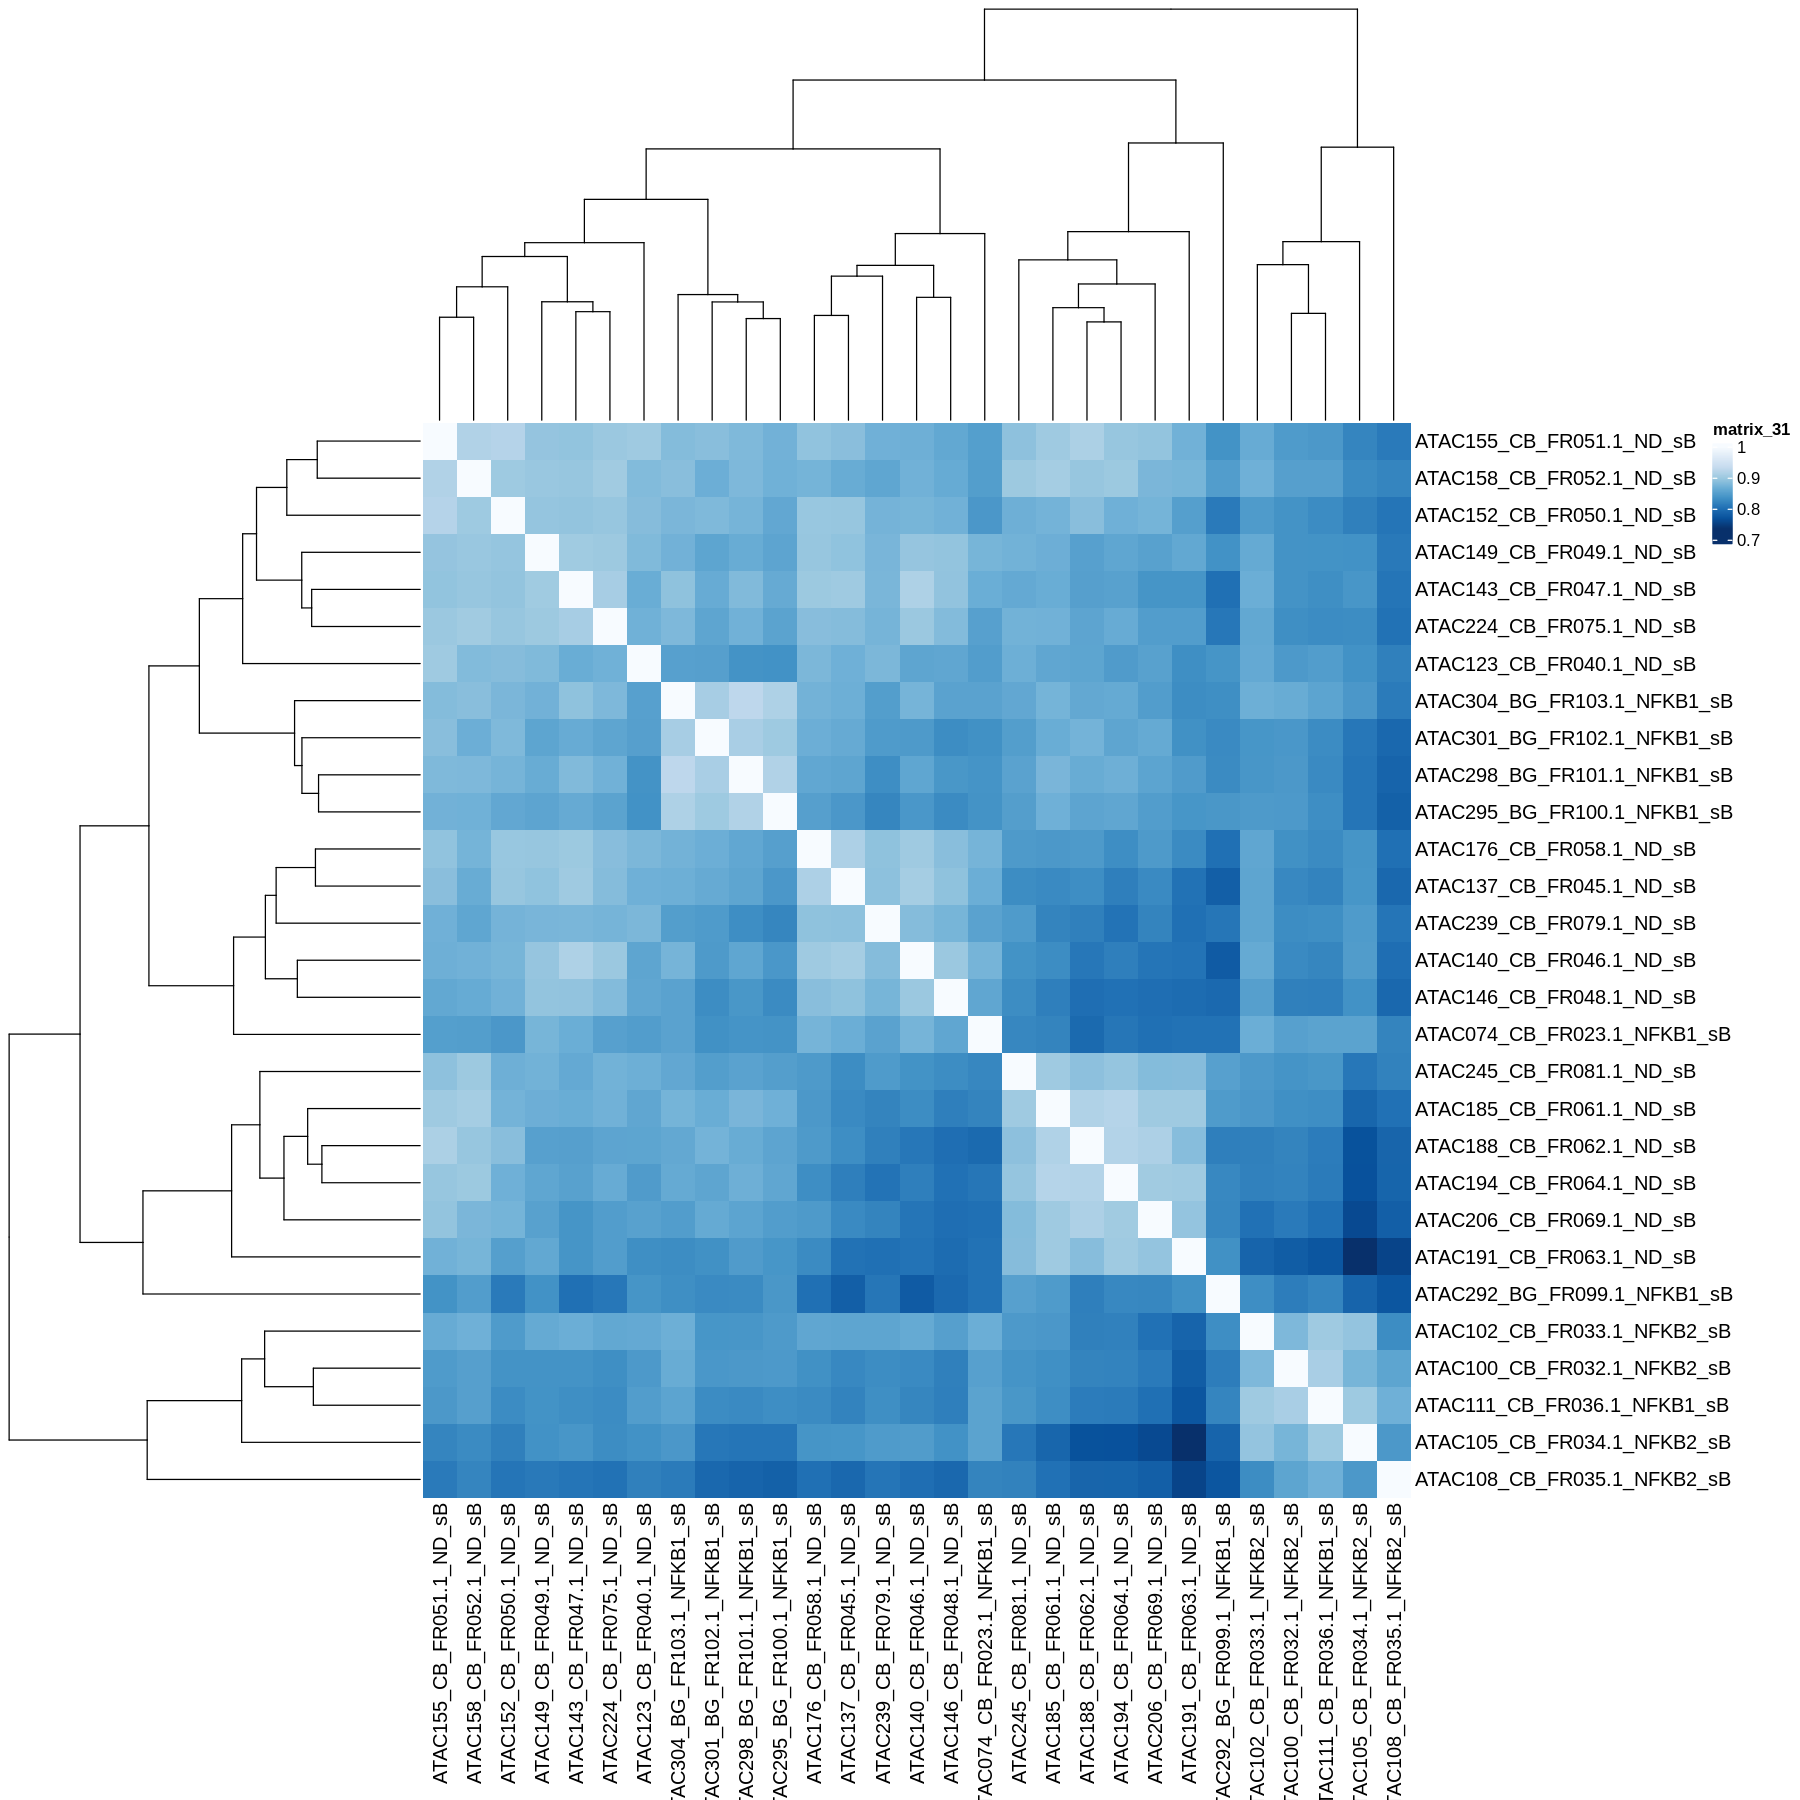

In [172]:
Heatmap(cor(log_mat), row_dend_width = ncol(log_mat) * unit(3, "mm"), column_dend_height  = ncol(log_mat) * unit(3, "mm"), col=colors)

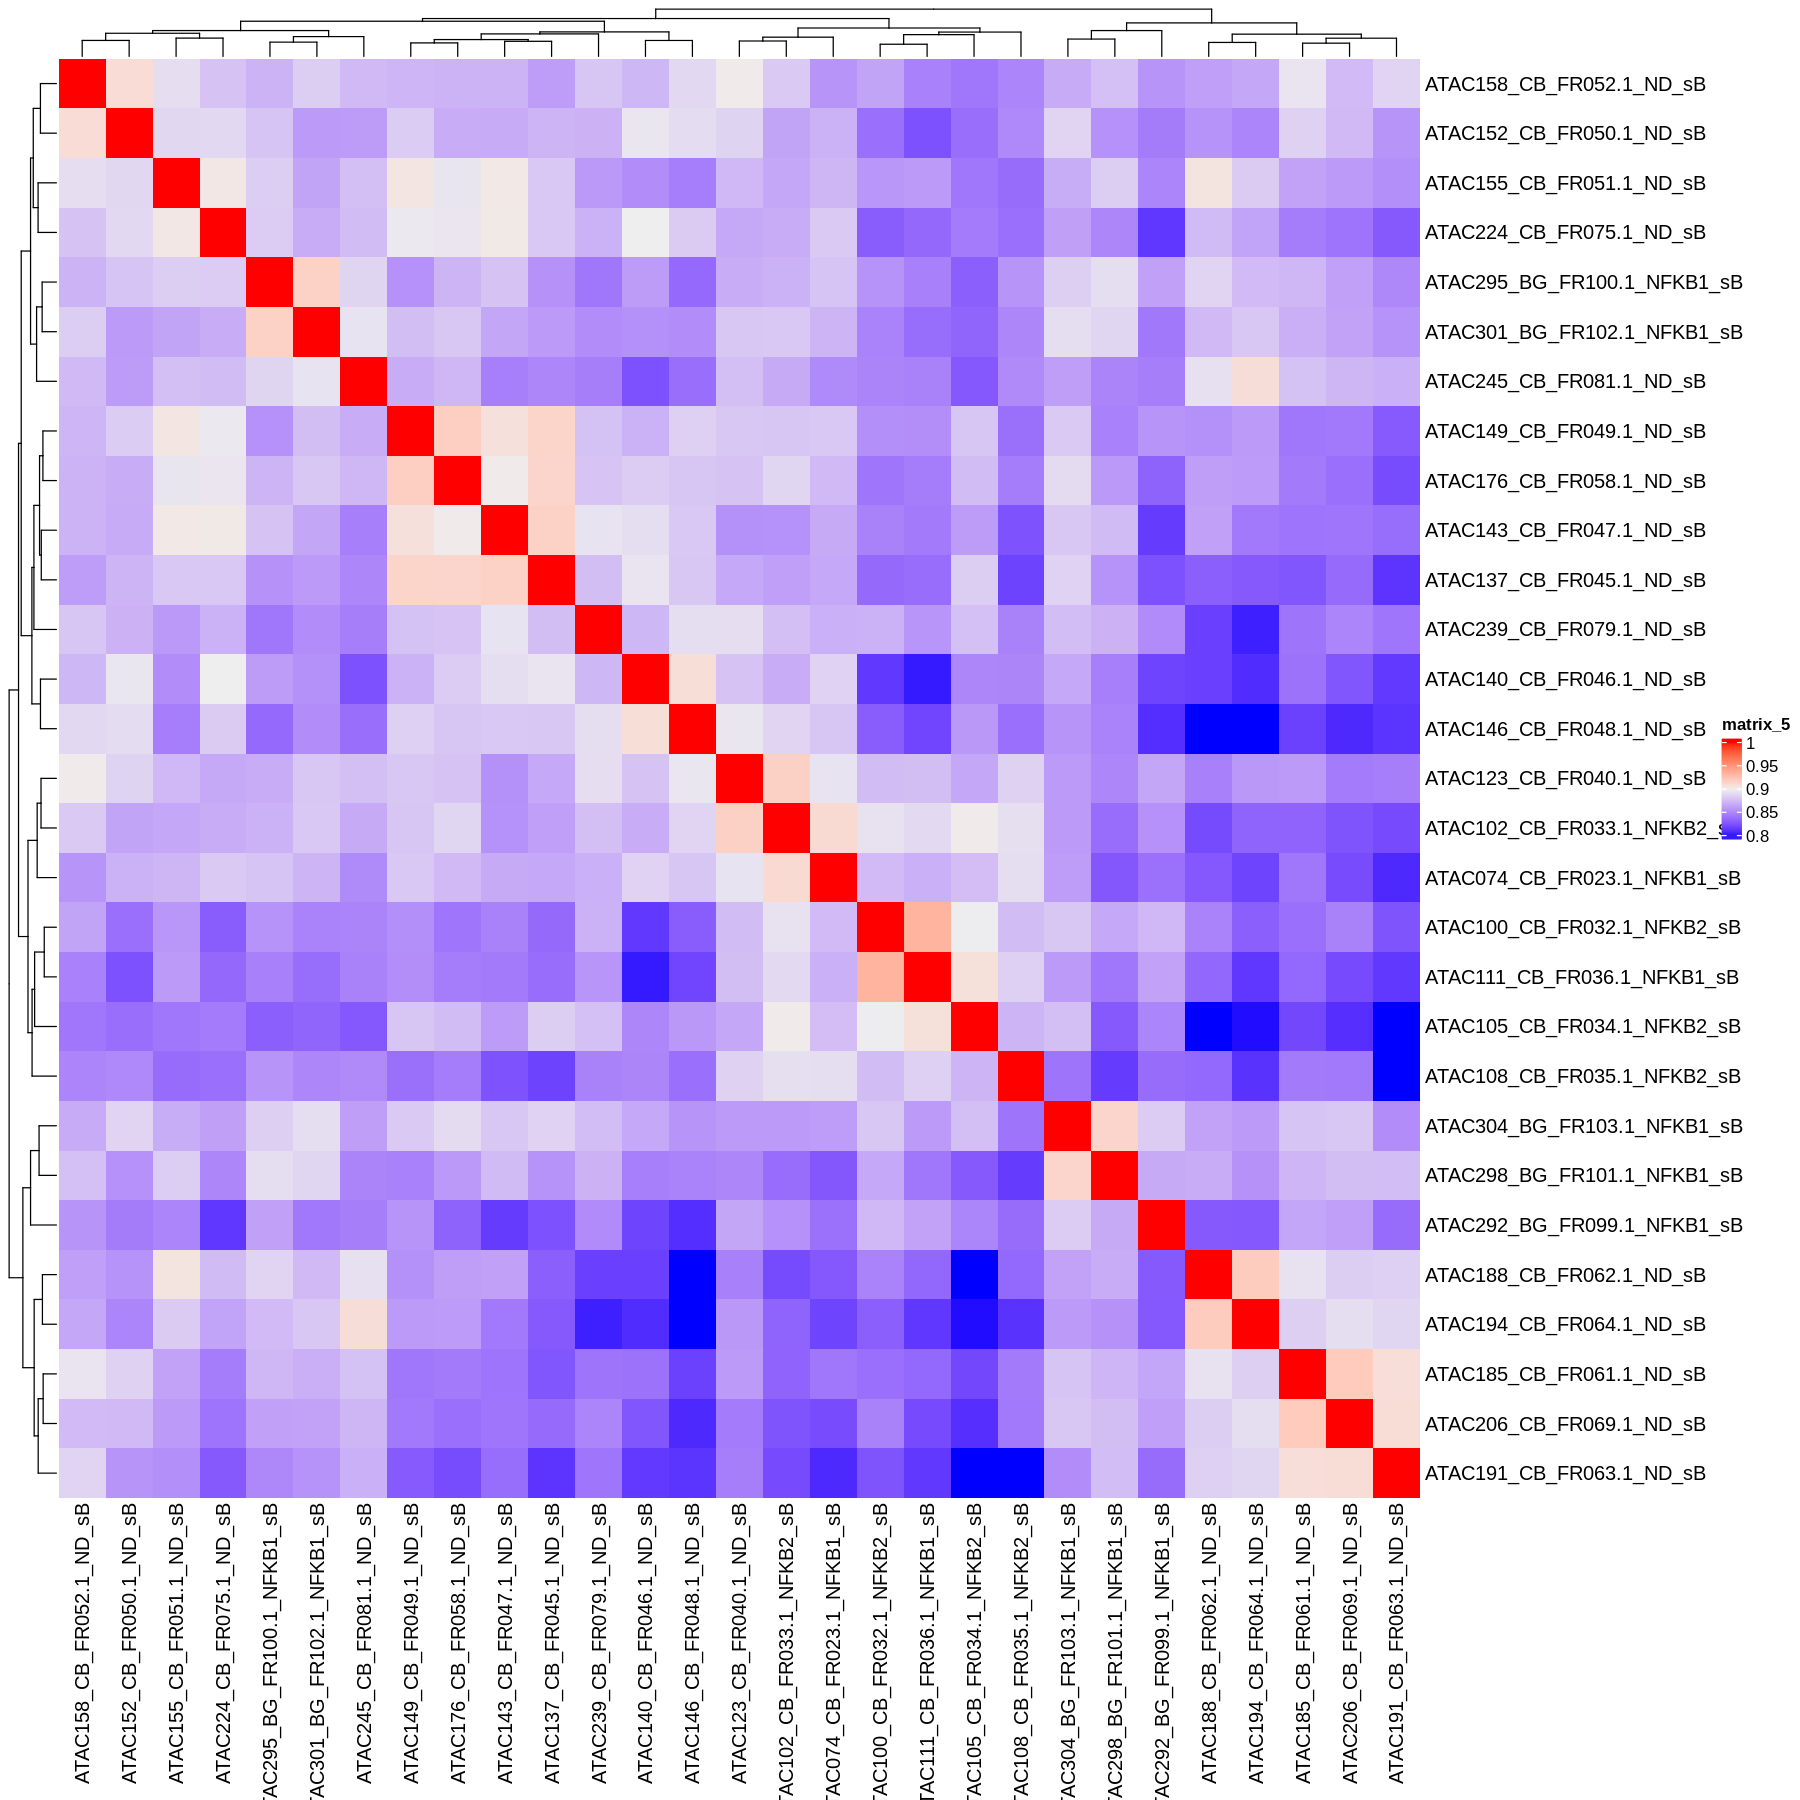

In [40]:
Heatmap(cor(counts / (1000000 / colSums(counts))))

# DESeq2

In [85]:
library(DESeq2)
library(pheatmap)

In [80]:
rownames(nfkb.nd.samples) <- nfkb.nd.samples$SampleID
nfkb.nd.samples$Condition <- as.factor(nfkb.nd.samples$Condition)

In [81]:
dds = DESeq2::DESeqDataSetFromMatrix(countData = adjusted, colData = nfkb.nd.samples, design = ~ Condition)

converting counts to integer mode



In [82]:
vsd <- vst(dds, blind=FALSE)

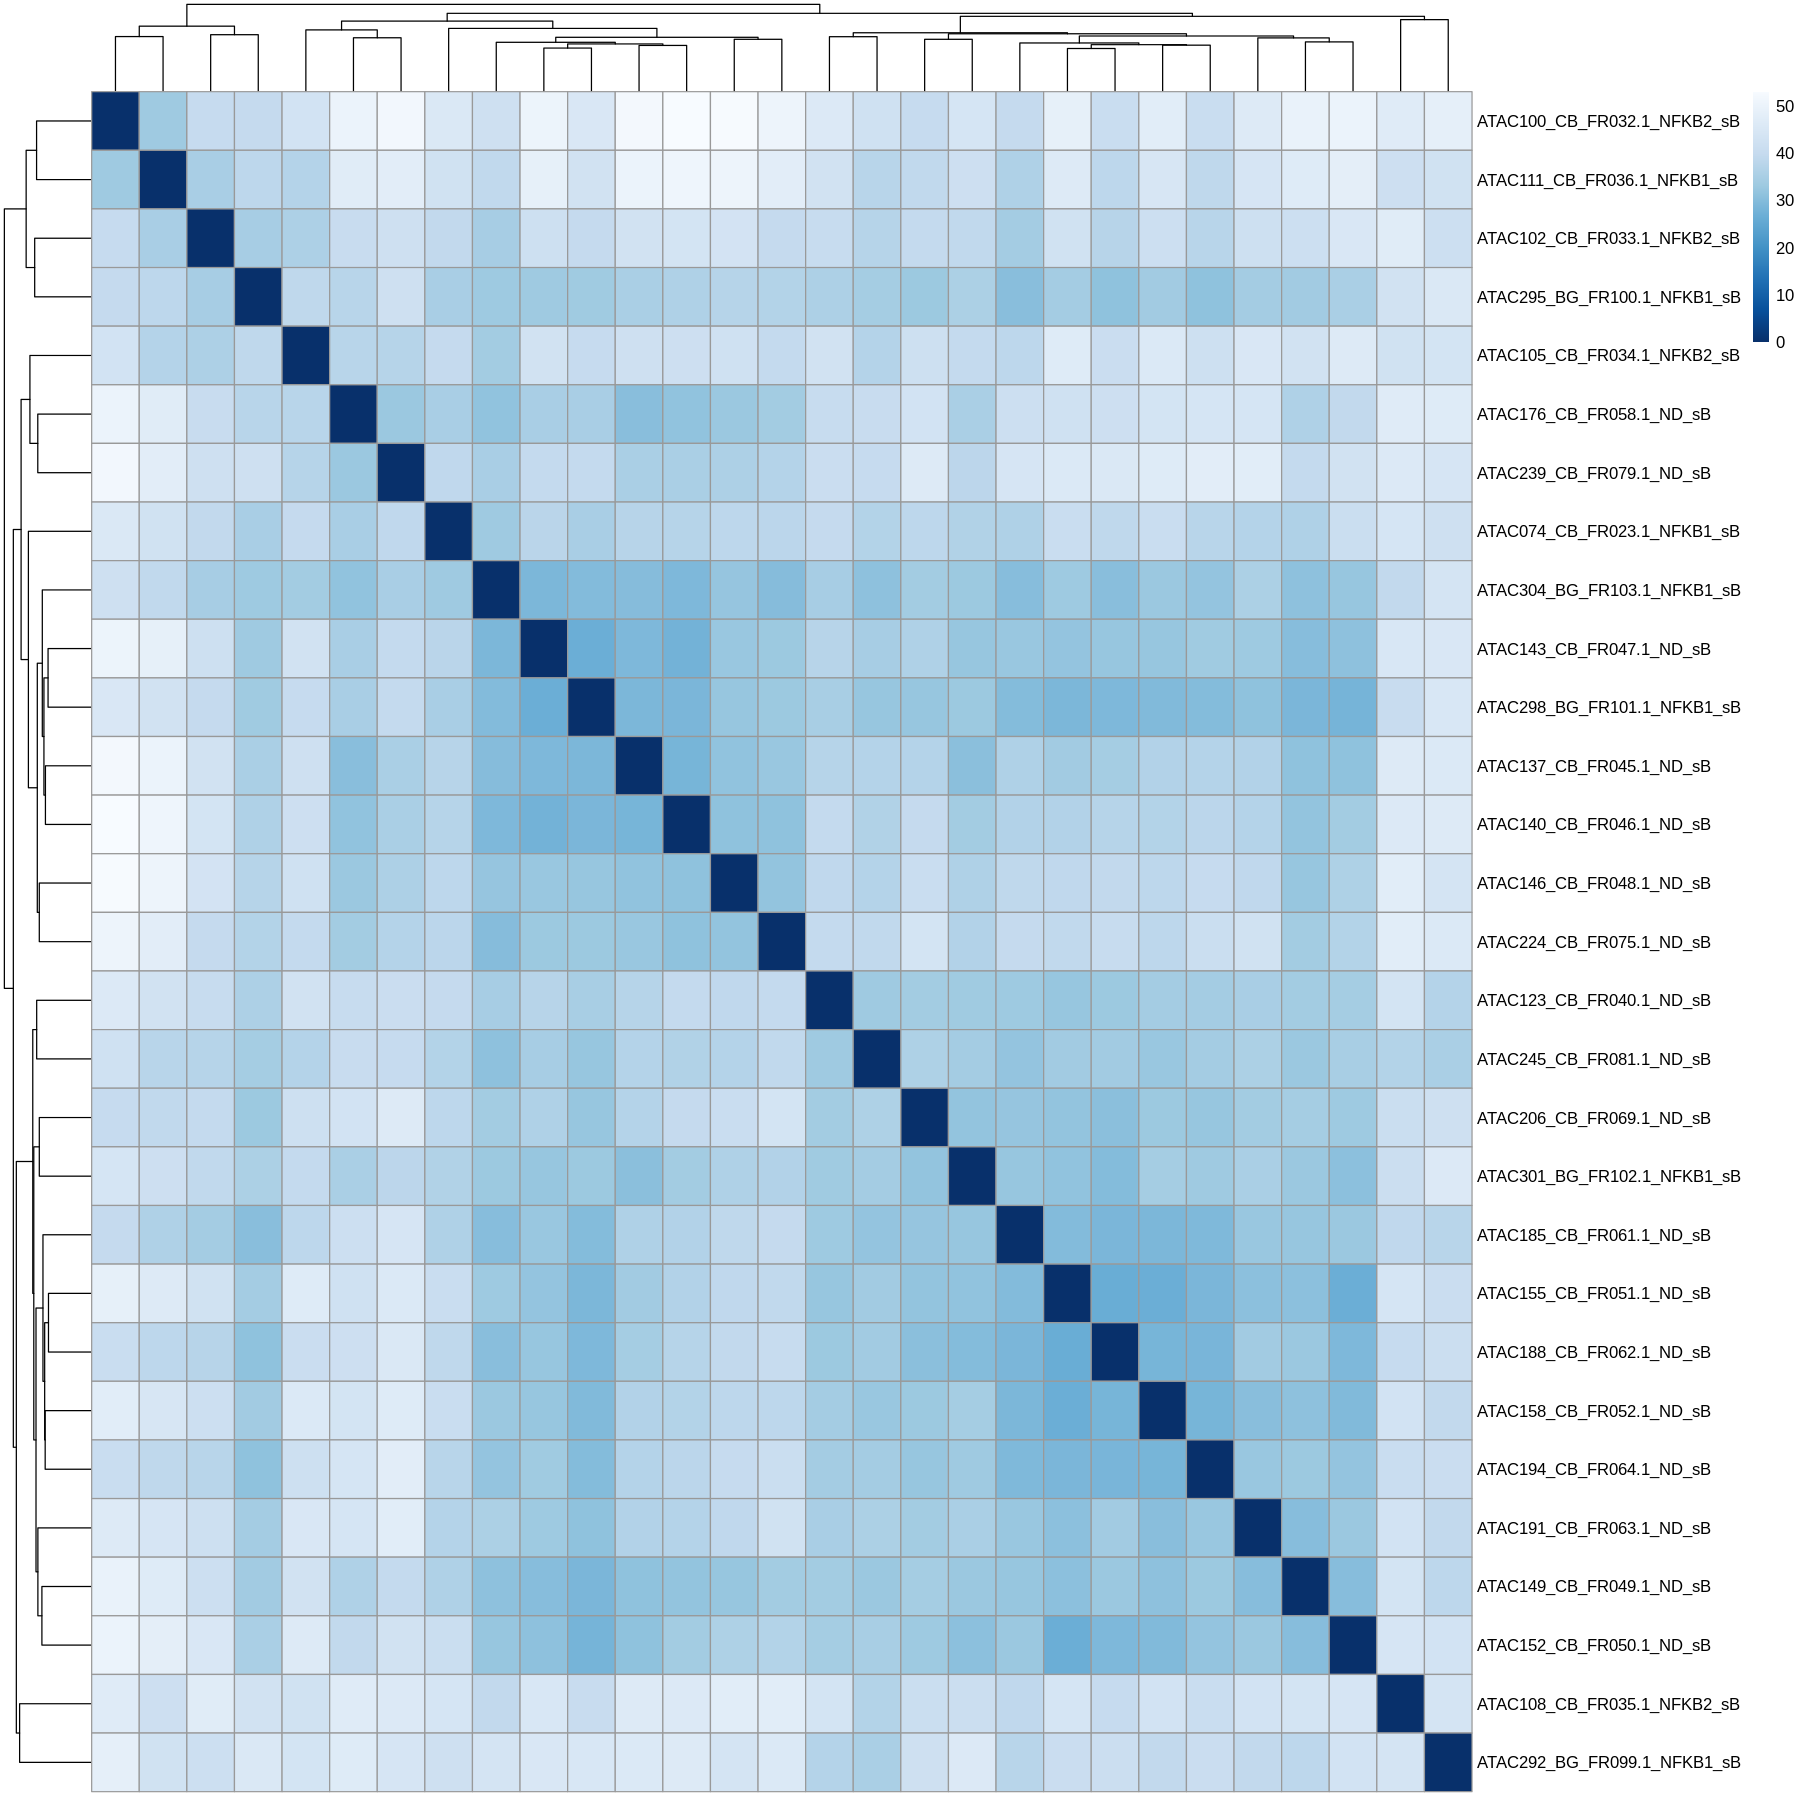

In [89]:
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- vsd$SampleID 
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

In [91]:
assay(vsd)

,ATAC074_CB_FR023.1_NFKB1_sB,ATAC100_CB_FR032.1_NFKB2_sB,ATAC102_CB_FR033.1_NFKB2_sB,ATAC105_CB_FR034.1_NFKB2_sB,ATAC108_CB_FR035.1_NFKB2_sB,ATAC111_CB_FR036.1_NFKB1_sB,ATAC123_CB_FR040.1_ND_sB,ATAC137_CB_FR045.1_ND_sB,ATAC140_CB_FR046.1_ND_sB,ATAC143_CB_FR047.1_ND_sB,⋯,ATAC194_CB_FR064.1_ND_sB,ATAC206_CB_FR069.1_ND_sB,ATAC224_CB_FR075.1_ND_sB,ATAC239_CB_FR079.1_ND_sB,ATAC245_CB_FR081.1_ND_sB,ATAC292_BG_FR099.1_NFKB1_sB,ATAC295_BG_FR100.1_NFKB1_sB,ATAC298_BG_FR101.1_NFKB1_sB,ATAC301_BG_FR102.1_NFKB1_sB,ATAC304_BG_FR103.1_NFKB1_sB
1,6.986633,6.870213,6.881686,6.863430,7.067716,6.916155,7.115739,6.877495,6.886108,6.918276,⋯,6.876076,6.957175,6.966193,6.949995,6.973998,6.961694,6.900589,6.954913,6.928101,6.865052
2,7.052334,6.929698,6.983908,6.825196,7.128228,6.958764,7.092624,6.920595,6.926180,6.852264,⋯,6.919045,7.024878,6.834319,7.076516,7.017660,7.102426,6.929356,6.918462,6.902354,6.842461
3,6.787688,6.837173,6.652385,6.990531,6.880372,6.893348,6.961331,6.854279,6.842093,6.625215,⋯,6.743632,6.980701,6.882642,7.016814,7.017660,7.122981,6.900589,6.787030,6.421624,6.842461
4,7.841018,7.993238,7.826475,7.874416,8.002374,8.048945,7.929553,7.631157,7.613613,7.728114,⋯,7.848471,7.948805,7.761856,7.809322,7.803179,7.678444,7.871839,7.713482,7.971840,7.803802
5,7.009396,6.801184,7.028330,6.931121,6.923739,6.869339,6.677196,6.899549,6.818201,6.918276,⋯,7.061714,6.980701,7.054709,6.778932,6.844572,6.804619,6.800927,6.954913,7.040367,7.090752
6,7.474497,7.802704,7.750526,7.577804,7.638430,7.725349,7.483229,7.489957,7.406832,7.448716,⋯,7.596255,7.671232,7.562895,7.527173,7.580052,7.521274,7.646167,7.566396,7.466497,7.537292
7,7.031265,7.096395,7.089149,6.961681,7.183607,7.270096,6.961331,6.978806,7.118106,7.091389,⋯,7.107219,7.157836,7.102015,6.872901,7.182193,7.036339,6.982308,7.159299,7.231806,7.076294
8,7.401176,7.449163,7.515109,7.425544,7.540467,7.570824,7.469004,7.343984,7.416082,7.296335,⋯,7.450256,7.497962,7.364798,7.353126,7.379790,7.417992,7.474057,7.373618,7.443440,7.369595
9,7.375282,7.449163,7.383774,7.240369,7.259267,7.553045,7.258583,7.109337,7.170623,7.238352,⋯,7.412189,7.297626,7.146029,7.271974,7.367203,7.375890,7.395010,7.183755,7.419762,7.220095
10,7.092368,7.338527,7.069552,6.990531,7.067716,7.341690,7.138053,7.178896,7.219410,7.296335,⋯,7.341185,7.174782,7.102015,7.113284,7.149087,7.361375,7.192020,7.093935,7.151544,7.243320
